In [1]:
## Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline

In [2]:
## Read Data
lol_ranked_df = pd.read_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\lol_ranked_data_merged.csv")

## Duplicate source data
lol_ranked_df_copy = lol_ranked_df.copy() 

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
## Contains a lot of '\N' values
lol_ranked_df_copy.drop('wardsbought',inplace=True, axis=1)

In [4]:
## Selecting a subset of the original data
# - Match ID 127704 doesn't have complete data
# - We selected games played in the EUW server
# - We selected games played in Season 8
lol_ranked_df_copy = lol_ranked_df_copy[(lol_ranked_df_copy.matchid != 127704) & (lol_ranked_df_copy.platformid == 'EUW1') & (lol_ranked_df_copy.seasonid == 8)]

In [5]:
lol_ranked_df_copy.head()

,id,matchid,player,name,platformid,adjposition,team_role,creation,version,seasonid,...,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood
0,9,10,1,Warwick,EUW1,JUNGLE,blue - JUNGLE,1495068946860,7.10.187.9675,8,...,42.0,69.0,42.0,27.0,610.0,13.0,0.0,10.0,0.0,0.0
1,10,10,2,Nami,EUW1,DUO_SUPPORT,blue - DUO_SUPPORT,1495068946860,7.10.187.9675,8,...,17.0,1.0,1.0,0.0,211.0,14.0,1.0,17.0,3.0,0.0
2,11,10,3,Draven,EUW1,DUO_CARRY,blue - DUO_CARRY,1495068946860,7.10.187.9675,8,...,205.0,3.0,1.0,2.0,182.0,14.0,1.0,13.0,5.0,0.0
3,12,10,4,Fiora,EUW1,TOP,blue - TOP,1495068946860,7.10.187.9675,8,...,164.0,6.0,6.0,0.0,106.0,15.0,0.0,3.0,0.0,0.0
4,13,10,5,Viktor,EUW1,MID,blue - MID,1495068946860,7.10.187.9675,8,...,235.0,4.0,3.0,1.0,159.0,15.0,0.0,10.0,0.0,0.0


In [15]:
game_stats_columns = [
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsplaced', 'wardskilled']

In [110]:
## Win/Loss
lol_ranked_df_copy.value_counts('win')

win
0.0    692560
1.0    692560
dtype: int64

Which position has the most kills?

In [111]:
lol_ranked_df_copy\
    .groupby(['adjposition'])\
    .agg({'kills':'mean'})\
    .sort_values(['kills'], ascending=False)

,kills
adjposition,
MID,7.482655
DUO_CARRY,7.174137
JUNGLE,6.506685
TOP,6.090689
DUO_SUPPORT,2.279626


Which Champion has the most Kill?

In [9]:
lol_ranked_df_copy\
    .groupby(['name'])\
    .agg({'kills':'mean'})\
    .sort_values('kills',ascending=False)\
    .head(10)

,kills
name,
Katarina,9.862069
Fizz,9.097543
Akali,9.034897
Master Yi,8.934568
Talon,8.923888
Twitch,8.704238
Zed,8.511063
Evelynn,8.289239
Kassadin,8.182234


In [88]:
lol_ranked_df_copy = lol_ranked_df_copy.reset_index()

In [89]:
lol_ranked_df_copy.head()

,id,matchid,player,name,platformid,adjposition,team_role,creation,version,seasonid,...,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood
0,9,10,1,Warwick,EUW1,JUNGLE,blue - JUNGLE,1495068946860,7.10.187.9675,8,...,42.0,69.0,42.0,27.0,610.0,13.0,0.0,10.0,0.0,0.0
1,10,10,2,Nami,EUW1,DUO_SUPPORT,blue - DUO_SUPPORT,1495068946860,7.10.187.9675,8,...,17.0,1.0,1.0,0.0,211.0,14.0,1.0,17.0,3.0,0.0
2,11,10,3,Draven,EUW1,DUO_CARRY,blue - DUO_CARRY,1495068946860,7.10.187.9675,8,...,205.0,3.0,1.0,2.0,182.0,14.0,1.0,13.0,5.0,0.0
3,12,10,4,Fiora,EUW1,TOP,blue - TOP,1495068946860,7.10.187.9675,8,...,164.0,6.0,6.0,0.0,106.0,15.0,0.0,3.0,0.0,0.0
4,13,10,5,Viktor,EUW1,MID,blue - MID,1495068946860,7.10.187.9675,8,...,235.0,4.0,3.0,1.0,159.0,15.0,0.0,10.0,0.0,0.0


Understanding game statistics

It is expected to have some correlating variables, for example *high* kills would result in *high* killing spree, *high* multi kill, e.t.c

Ways to address this would be to pick one of the variable (kills) or aggregate them (kills*largestkillingspree) or we could perfrom dimensionality reduction on this dataset to find the core relationship between these attributes without manual intervention or the removal of potential key drivers.

In [90]:
## Determining correlation between various game statistics
corr_all = lol_ranked_df_copy[game_stats_columns].corr()

<AxesSubplot:>

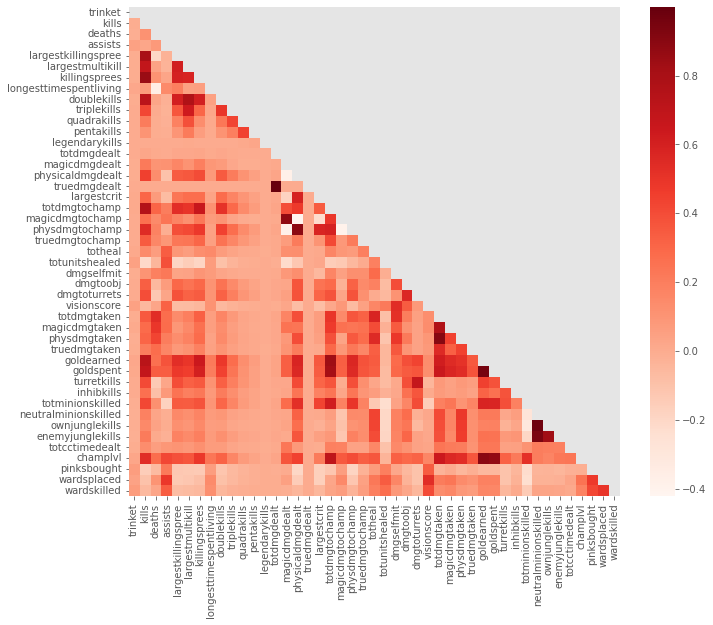

In [73]:
f, ax = plt.subplots(figsize = (11, 9))
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, cmap="Reds", mask=mask)

In [92]:
num_features = 15
game_stat_df = lol_ranked_df_copy[game_stats_columns]

In [93]:
# Standardizing the features
df_std = pd.DataFrame(StandardScaler().fit_transform(game_stat_df))
df_std.columns = game_stat_df.columns

In [94]:
df_std.head()

,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,...,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled
0,-0.114562,0.020594,1.307631,-1.297790,-0.291369,0.859080,0.508560,-0.028345,1.557114,-0.250044,...,-0.397974,-0.992923,1.494446,1.461237,1.386849,0.257040,-0.663538,-0.730440,-0.273233,-0.849857
1,0.267782,-1.304595,-1.262188,0.600953,-1.084718,-1.848333,-1.093603,1.568908,-0.593993,-0.250044,...,-0.397974,-1.291210,-0.609560,-0.562813,-0.615550,-0.345529,-0.243137,-0.033815,0.682422,0.500826
2,-0.114562,0.241459,0.665176,-0.607338,0.898653,0.859080,-0.292521,-0.227579,1.557114,-0.250044,...,-0.397974,0.951905,-0.547677,-0.562813,-0.467224,-0.389325,-0.243137,-0.033815,0.136334,1.401282
3,-0.114562,-0.200271,1.628858,-1.125177,-0.291369,-0.494627,-0.292521,-1.186606,-0.593993,-0.250044,...,-0.397974,0.462715,-0.454854,-0.315978,-0.615550,-0.504100,0.177264,-0.730440,-1.228888,-0.849857
4,-0.114562,-0.862866,0.665176,-1.125177,-1.084718,-0.494627,-1.093603,-0.497728,-0.593993,-0.250044,...,-0.397974,1.309849,-0.516736,-0.464079,-0.541387,-0.424059,0.177264,-0.730440,-0.273233,-0.849857


In [95]:
# Fit all 15 components for variance plotting
pca = PCA(n_components= num_features)
principal_components = pca.fit_transform(df_std)
principal_df = pd.DataFrame(data = principal_components)
principal_df.columns = ['PC'+str(x+1) for x in range(num_features)]
pca_str = pca.explained_variance_ratio_

In [96]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.076599,2.032236,-3.073934,-2.100909,-0.351066,0.182628,-1.317924,0.743445,-0.643455,-1.391997,0.098400,0.111734,-0.373239,0.237083,0.891478
1,-3.145276,1.740832,0.820630,1.668637,0.724628,-0.065771,0.579454,-0.220326,1.402949,-1.527191,-0.021792,0.015163,-0.449325,-0.293972,-0.090424
2,1.072645,-1.041277,0.059694,1.550839,-1.383350,0.081227,-1.014357,-0.046668,-1.023041,0.330016,-1.595997,0.040482,0.353741,0.539103,0.196074
3,0.752623,-1.095996,-0.954091,0.197063,-2.780770,-0.025195,0.764155,2.123907,-0.344259,-0.080543,1.148531,0.032909,-0.271732,-1.209132,-0.156161
4,-1.321702,0.019845,1.785242,-2.395021,-1.242607,-0.128236,1.070748,1.552878,0.574984,0.411180,-0.264552,-0.084700,-0.071161,-0.649741,0.064622


In [97]:
principal_df.shape

(1385120, 15)

In [98]:
lol_ranked_df_copy.shape

(1385120, 69)

In [121]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b]]

In [124]:
non_matches = returnNotMatches(lol_ranked_df_copy.columns,game_stats_columns)[0]

In [101]:
pca_full_df = pd.concat([lol_ranked_df_copy[non_matches], principal_df], axis=1)

In [104]:
 ## Original data with Principal Components attached 
 ## This can be a data normalization step for clustering with Kmeans
 pca_full_df.head()

,id,matchid,player,name,platformid,adjposition,team_role,creation,version,seasonid,...,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,9,10,1,Warwick,EUW1,JUNGLE,blue - JUNGLE,1495068946860,7.10.187.9675,8,...,0.182628,-1.317924,0.743445,-0.643455,-1.391997,0.098400,0.111734,-0.373239,0.237083,0.891478
1,10,10,2,Nami,EUW1,DUO_SUPPORT,blue - DUO_SUPPORT,1495068946860,7.10.187.9675,8,...,-0.065771,0.579454,-0.220326,1.402949,-1.527191,-0.021792,0.015163,-0.449325,-0.293972,-0.090424
2,11,10,3,Draven,EUW1,DUO_CARRY,blue - DUO_CARRY,1495068946860,7.10.187.9675,8,...,0.081227,-1.014357,-0.046668,-1.023041,0.330016,-1.595997,0.040482,0.353741,0.539103,0.196074
3,12,10,4,Fiora,EUW1,TOP,blue - TOP,1495068946860,7.10.187.9675,8,...,-0.025195,0.764155,2.123907,-0.344259,-0.080543,1.148531,0.032909,-0.271732,-1.209132,-0.156161
4,13,10,5,Viktor,EUW1,MID,blue - MID,1495068946860,7.10.187.9675,8,...,-0.128236,1.070748,1.552878,0.574984,0.411180,-0.264552,-0.084700,-0.071161,-0.649741,0.064622


In [120]:
# pca_full_df.to_csv("C:\\Users\\Admin\\Desktop\\upwork_jobs\\lol_project\\data\\lol_pca_merged_df.csv")

## Exploring PCA Result

About 25% of the variance was explained in the first principal component (PC) and about 10% of the variance was explained in the second PC and so on..

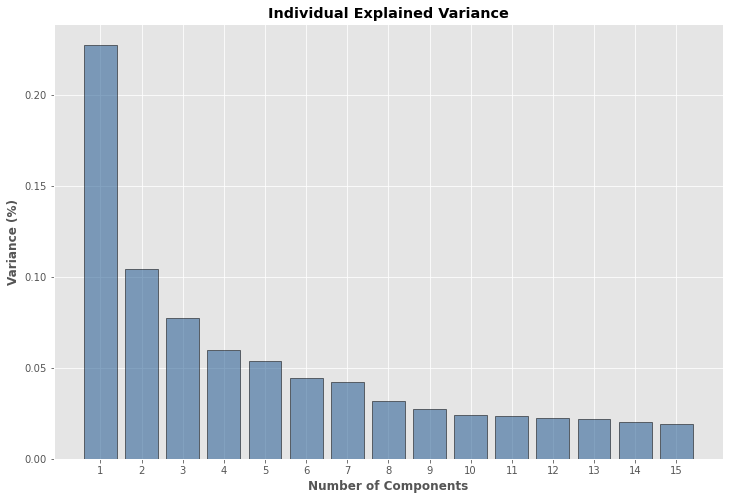

In [105]:
# Plot the variance of each PC
plt.figure(figsize=(12,8))
plt.bar(np.arange(1, num_features + 1), pca_str, color=(0.2, 0.4, 0.6, 0.6),edgecolor='black')
plt.xticks(np.arange(1, num_features + 1))
plt.xlabel('Number of Components',fontweight='bold')
plt.ylabel('Variance (%)',fontweight='bold')
plt.title('Individual Explained Variance',fontweight='bold')
plt.show()

In [106]:
# Create a table of all the feature strengths for each component
all_comps = []
for i in range(num_features):
    all_comps.append(pca.components_[i])
var_str = pd.DataFrame(all_comps, columns= game_stat_df.columns, index=range(1, num_features + 1)).abs().transpose()

In [119]:
# Preview
var_str.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
trinket,0.001483,0.016452,0.024490,0.054209,0.024771,0.000221,1.135743e-02,0.065945,0.008494,0.205050,0.091570,0.048449,0.966399,0.012085,0.016731
kills,0.255519,0.134607,0.041055,0.086250,0.113816,0.011682,8.177192e-02,0.079512,0.203049,0.075981,0.000353,0.025577,0.006735,0.002396,0.015733
deaths,0.084419,0.141976,0.039356,0.113228,0.380779,0.024067,2.178883e-01,0.105141,0.185877,0.253006,0.180445,0.007835,0.030549,0.034674,0.034680
assists,0.065218,0.231901,0.184598,0.186067,0.079545,0.000550,1.686152e-02,0.125253,0.105741,0.111005,0.286214,0.003206,0.023227,0.181691,0.073151
largestkillingspree,0.195509,0.170917,0.020018,0.053507,0.233218,0.002577,6.296911e-08,0.097205,0.103631,0.179138,0.103006,0.023522,0.022444,0.000417,0.052025


In [108]:
actual_str = pd.DataFrame(all_comps, columns= game_stat_df.columns, index=range(1, num_features + 1)).transpose()

In [116]:
# Print out the strongest variables for the top 8 PCs
for i in range(1,9):
    print("")
    print("PC "+str(i))
    for j in range(5):
        key = var_str.sort_values(i, ascending=False)[i].keys()[j]
        if actual_str[actual_str.index == key][i].values[0] > 0:
            direction = 'High'
        else:
            direction = 'Low'
        print(direction, key)


PC 1
High goldearned
High goldspent
High totdmgtochamp
High kills
High champlvl

PC 2
High wardsplaced
High totheal
High totdmgtaken
High assists
High physdmgtaken

PC 3
Low neutralminionskilled
Low ownjunglekills
Low enemyjunglekills
High magicdmgtochamp
High magicdmgdealt

PC 4
Low magicdmgdealt
High totunitshealed
Low magicdmgtochamp
High visionscore
High wardskilled

PC 5
Low deaths
Low totminionskilled
High largestkillingspree
Low physdmgtochamp
High neutralminionskilled

PC 6
Low truedmgdealt
Low totdmgdealt
High quadrakills
High triplekills
High largestmultikill

PC 7
Low quadrakills
Low triplekills
Low pentakills
High dmgtoturrets
Low largestmultikill

PC 8
High dmgselfmit
High dmgtoobj
High visionscore
High pentakills
High quadrakills
